## Clustering K-means


Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics import silhouette_score

In [5]:
with open('7.10._clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)
x = data_clustering['X']
y = data_clustering['Y']

In [6]:
kmeans_model = KMeans(n_clusters = 4, random_state=17).fit(x)
silhouette_4 = silhouette_score(x, kmeans_model.labels_)
silhouette_4

0.4417501080615704

In [7]:
kmeans_model_2 = KMeans(n_clusters = 2, random_state=17).fit(x)
silhouette_2 = silhouette_score(x, kmeans_model_2.labels_)
silhouette_2

0.4465356047465253

2 кластера лучше 4



Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [8]:
kmeans_model_3 = KMeans(n_clusters = 4, random_state=17).fit(x)
ami_4 = adjusted_mutual_info_score(y, kmeans_model_3.labels_, average_method = 'arithmetic')
ami_4

0.5827727212133396

In [9]:
kmeans_model_4 = KMeans(n_clusters = 2, random_state=17).fit(x)
ami_2 = adjusted_mutual_info_score(y, kmeans_model_4.labels_, average_method = 'arithmetic')
ami_2

0.9286022516535728

2 кластера существенно лучше 4 кластеров



Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [11]:
import pandas as pd
clustering_hw = pd.read_csv('7.10_clustering_hw.csv')
x = clustering_hw.iloc[:, [0,1]]
y = clustering_hw.iloc[:, [2]]

In [13]:
from sklearn.metrics.pairwise import euclidean_distances

In [19]:
metrics = []
max_cluster = 7
for cluster_num in range(1, max_cluster):
    kmeans_model_5 = KMeans(n_clusters = cluster_num,
                           random_state = 17).fit(x)
    centroids, labels = kmeans_model_5.cluster_centers_, kmeans_model_5.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(x[labels==centroid_label], centroids[centroid_label, :].reshape(1,-1)).sum(axis=0)[0]
    metrics.append(metric)


C:\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


the best cluster num: 3


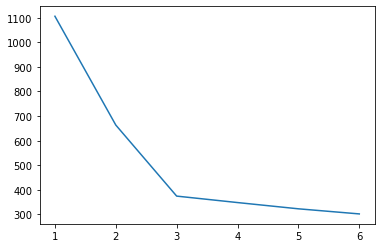

In [20]:
D = []
for i in range(0, len(metrics) - 1):
    d = abs(metrics[i + 1] - metrics[i]) / abs(metrics[i] - metrics[i-1])
    D.append(d)

print('the best cluster num: %s' %(np.argmin(D) + 1))
plt.plot([i + 1 for i in range(len(metrics))], metrics)
plt.show()

In [25]:
kmeans_model_6 = KMeans(n_clusters = 3, random_state = 17).fit(x)
x_pred_1 = [[5, 8]]
kmeans_model_6.predict(x_pred_1)

C:\Anaconda 3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [26]:
x_pred_2 = [[0, 5]]
kmeans_model_6.predict(x_pred_2)

C:\Anaconda 3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

Точки принадлежат разным кластерам.

In [36]:
kmeans_pred = kmeans_model_6.predict(x)
ami = adjusted_mutual_info_score(y.iloc[:, 0], kmeans_pred, average_method = 'arithmetic')
ami

0.9700074953683859